In [1]:
!pip3 install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import seaborn as sns
import glob
import os
from scipy.spatial import ConvexHull
from scipy.optimize import linear_sum_assignment
from scipy.stats import multivariate_normal
from scipy.spatial import Delaunay
from sklearn.cluster import KMeans
import warnings
import networkx as nx
import glob
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from utils import *

spielen teams mit rolle 0 immer links nach rechts ?

In [3]:
data_files = os.listdir("./xy_data")

col_names = ["frame_number", "track_id", "role", "xbox", "ybox", "w", "h", "xworld", "yworld", "IoU"]
n_roles = 10

tracking_data_role_0 = []

for file in data_files:
    data = pd.read_csv(f"./xy_data/{file}", names=col_names)
    data = data.drop( ["xbox", "ybox", "w", "h"], axis=1)
    data = data[data["role"] == 0]
    data = normalize_tracking_data(data)
    players_role_0, init_means = initialize_roles_with_kmeans(data, n_roles)
    tracking_data_role_0.append({"file": file, "players": players_role_0, "init_means": init_means})



In [4]:
updated_tracking_data = []

for i in range(len(tracking_data_role_0)):
   
    players = tracking_data_role_0[i]["players"]
    file = tracking_data_role_0[i]["file"]
    print(f"Processing file {file}")
    init_means = tracking_data_role_0[i]["init_means"]
    players_role_0, role_pdfs = update_roles(players, init_means, n_roles)
    updated_tracking_data.append({"file": file, "players": players_role_0, "role_pdfs": role_pdfs})

    


Processing file alt2_data.txt
Processing file alt_data.txt
Processing file fis1_data.txt
Processing file fis2_data.txt
Processing file fried1_data.txt
Processing file friedr2_data.txt
Processing file gr1_data.txt
Processing file gr2_data.txt
Processing file m1_data.txt
Processing file m2_data.txt
Processing file st1_data.txt
Processing file st2_data.txt
Processing file stv1_data.txt
Processing file stv2_data.txt
Processing file t1_data.txt
Processing file t2_data.txt
Processing file w1_data.txt


ValueError: Must have equal len keys and value when setting with an iterable

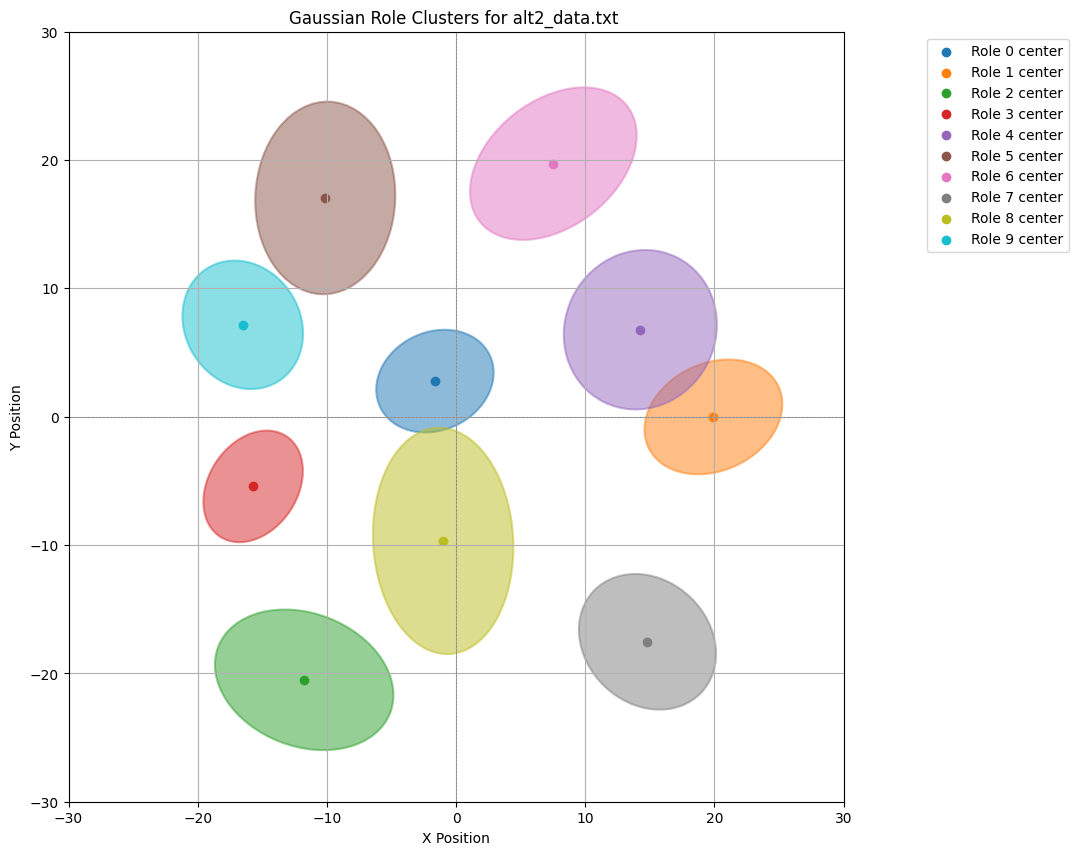

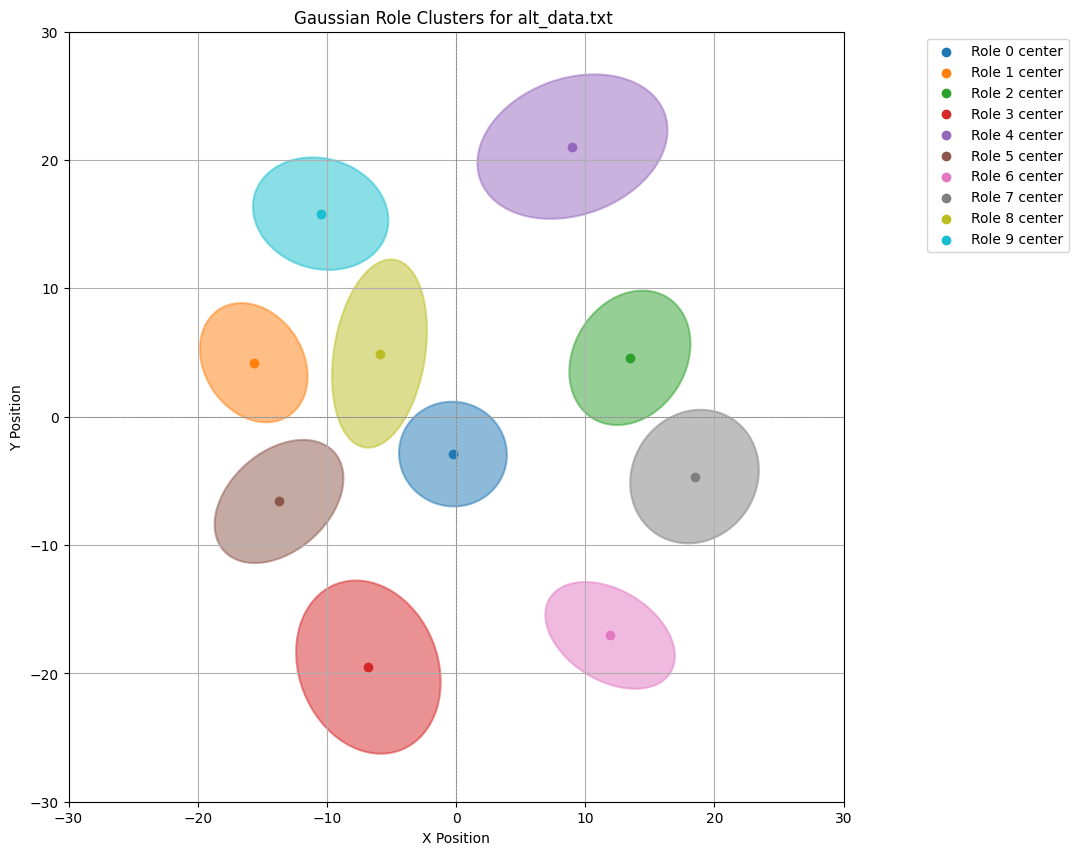

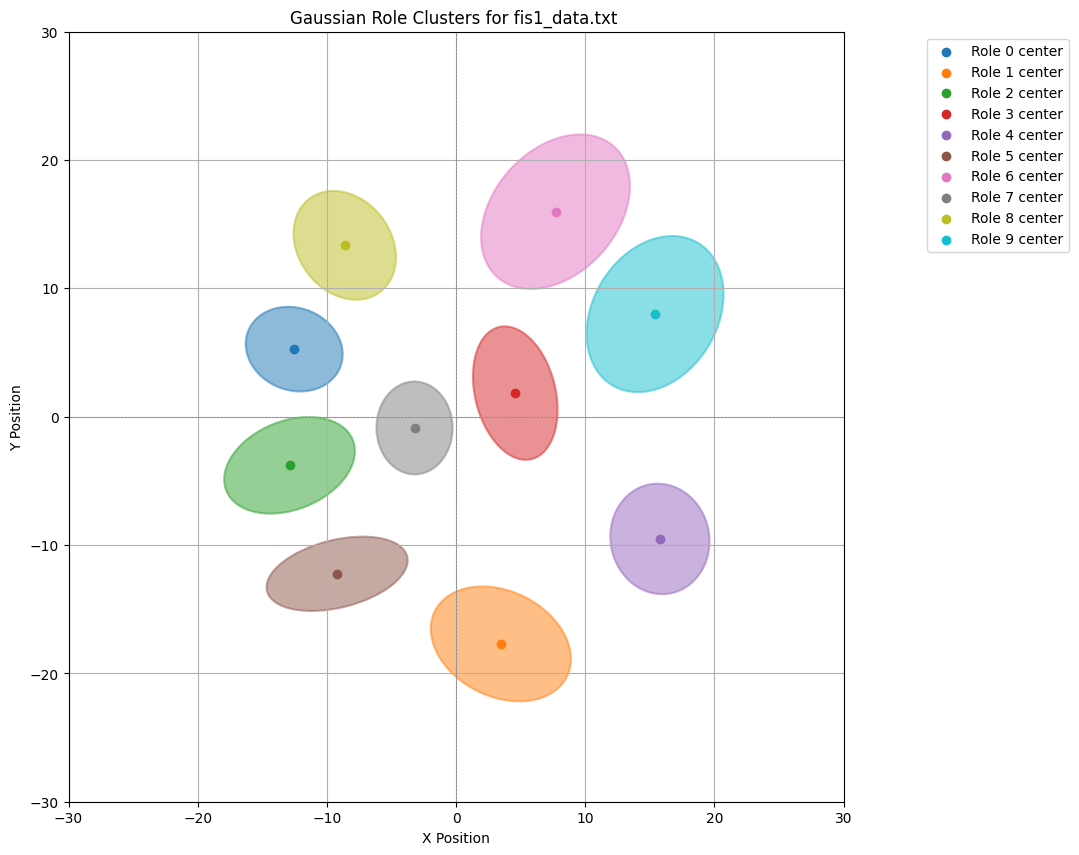

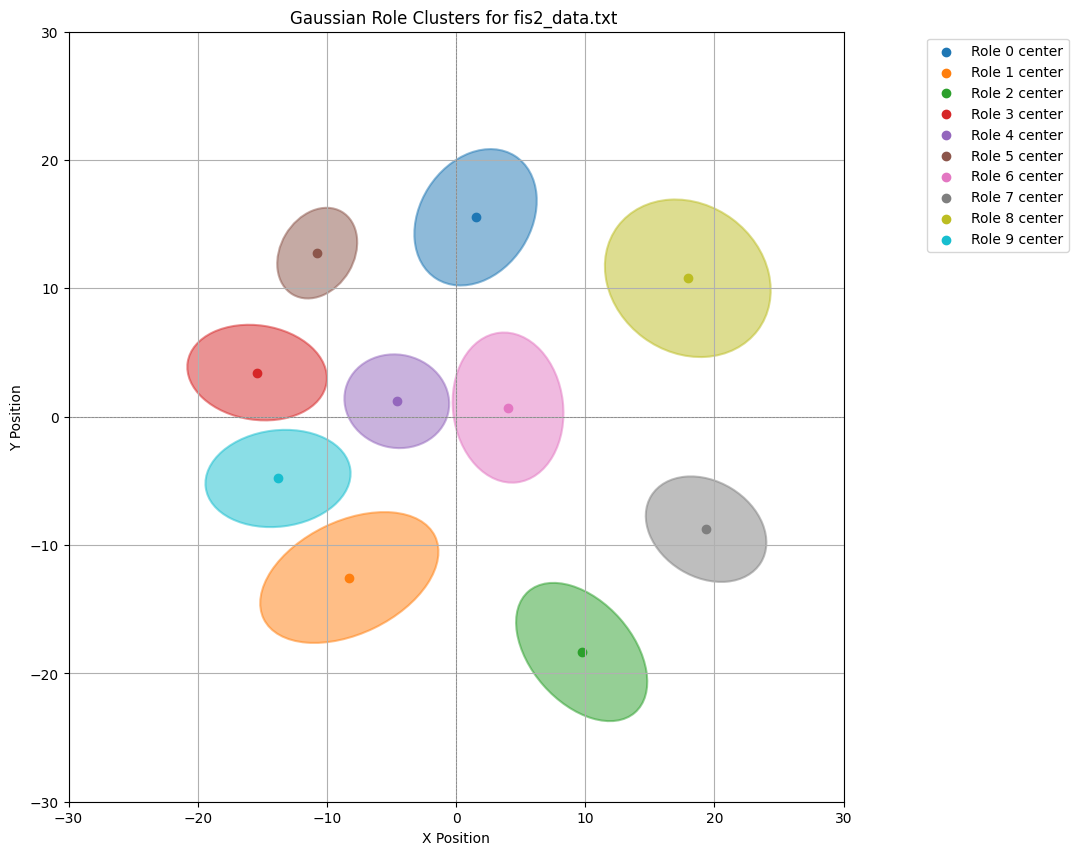

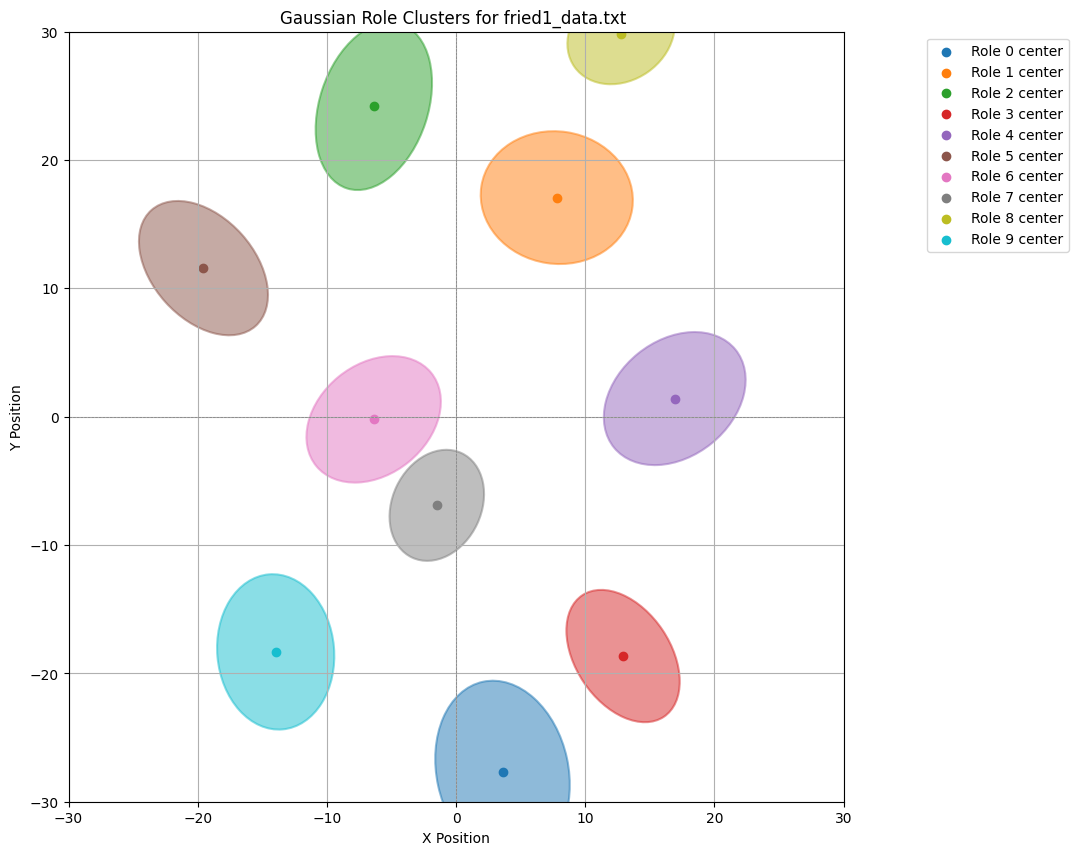

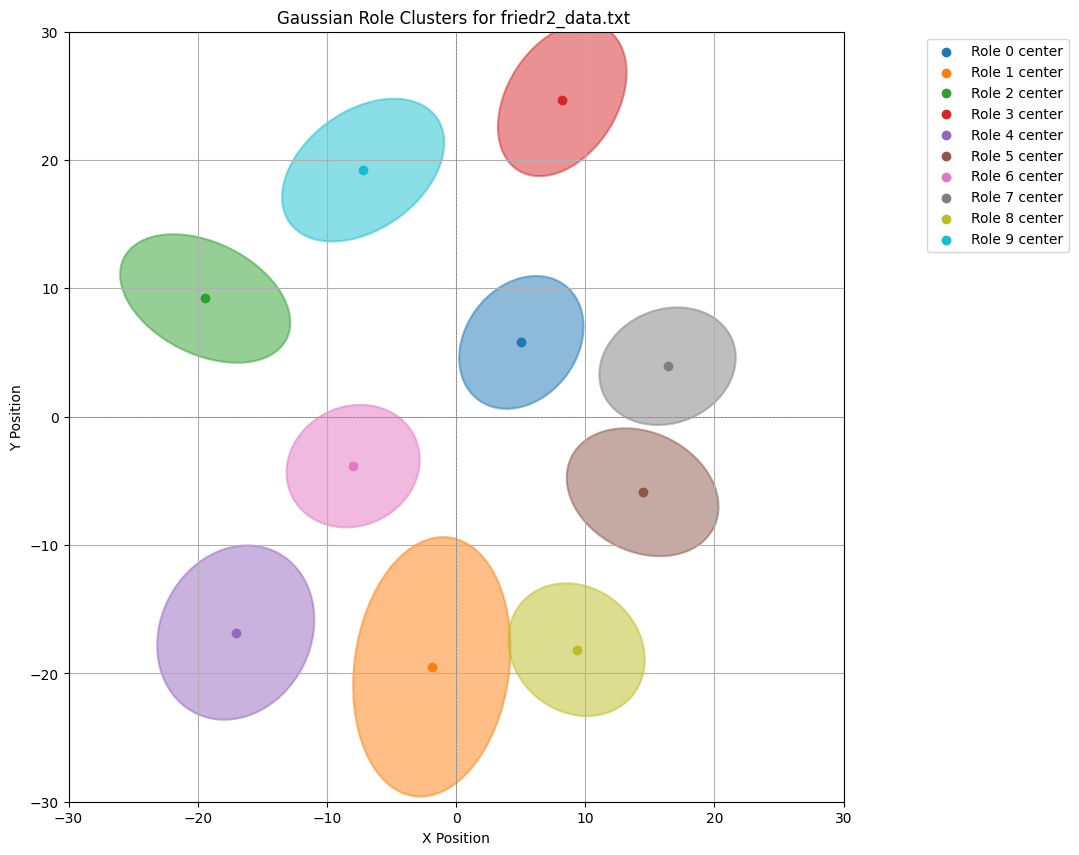

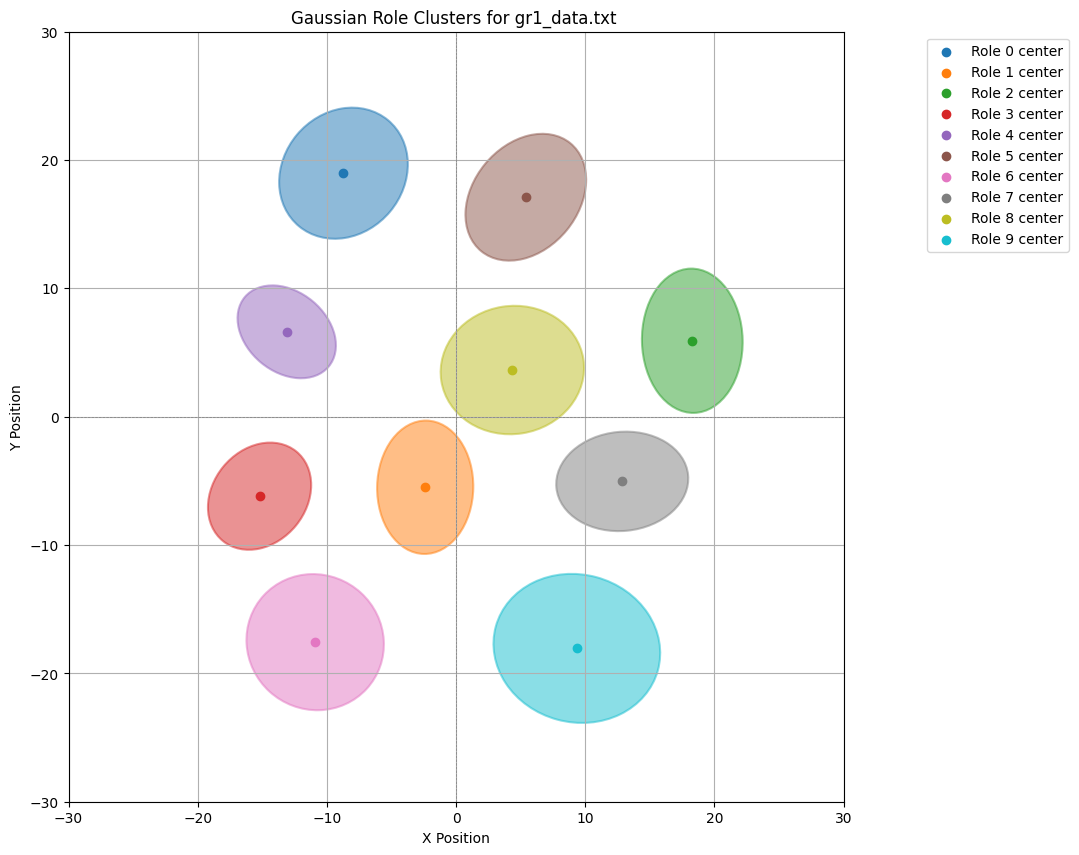

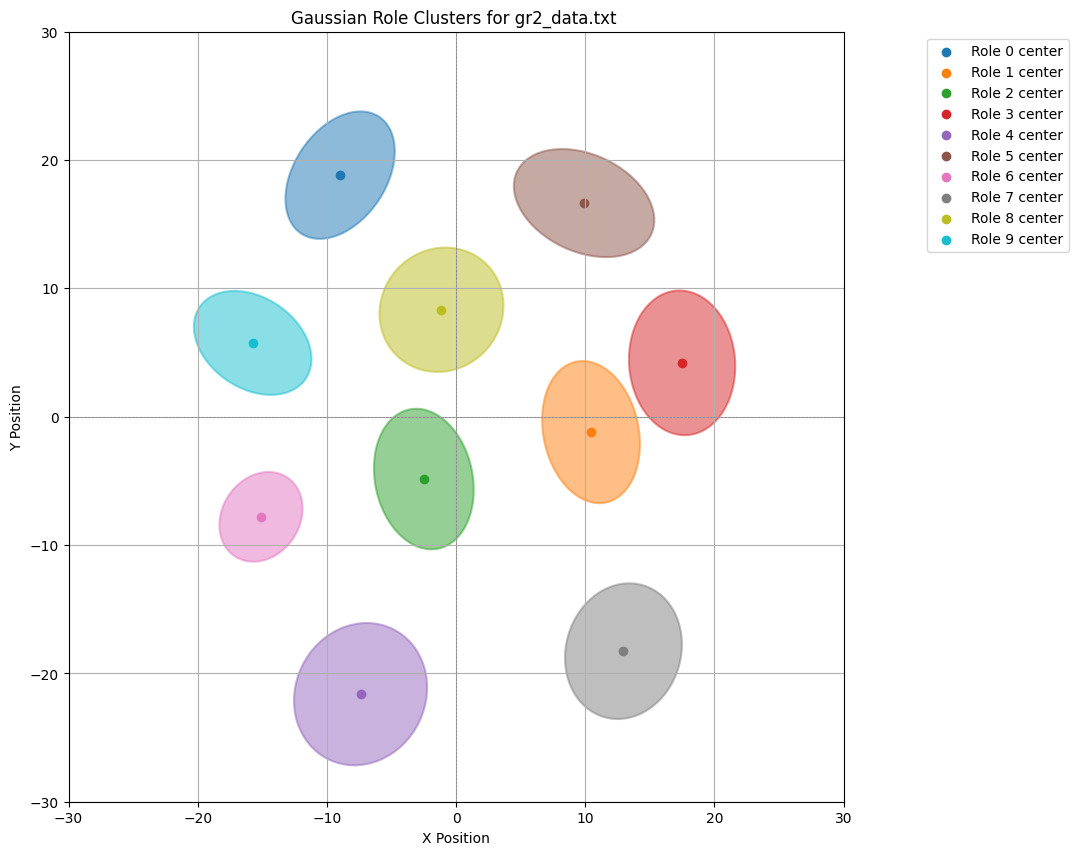

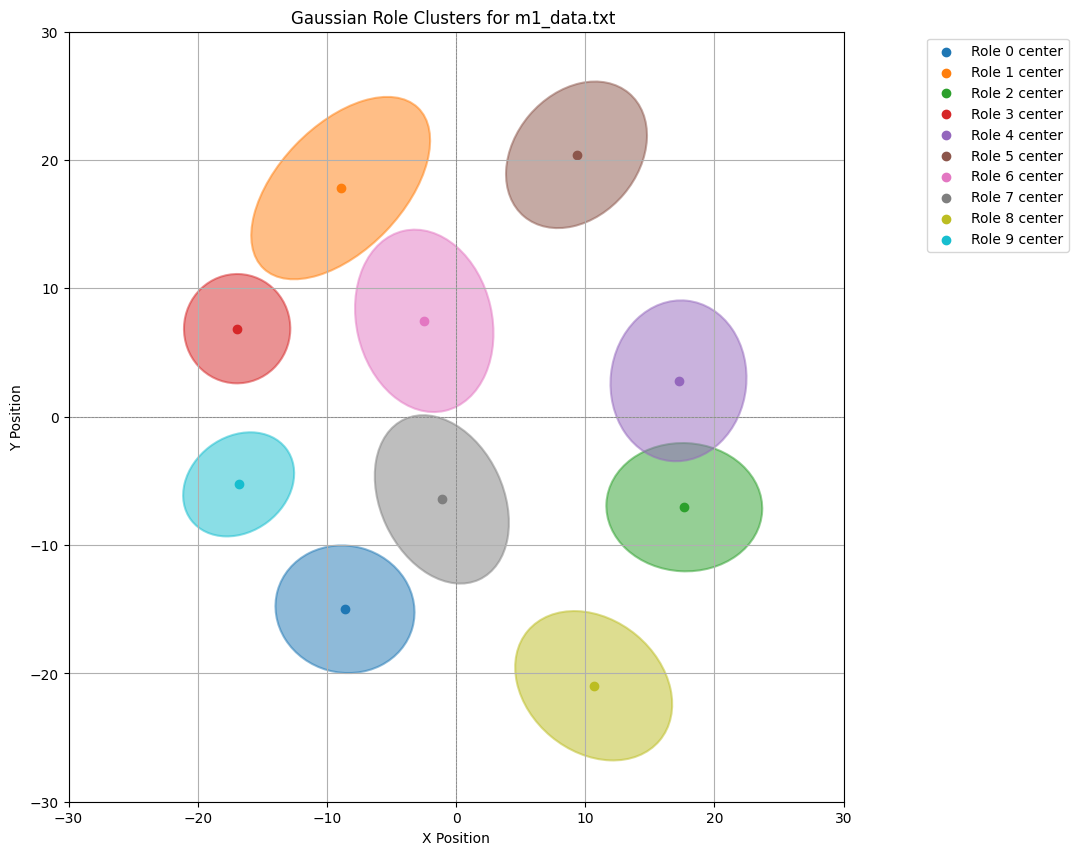

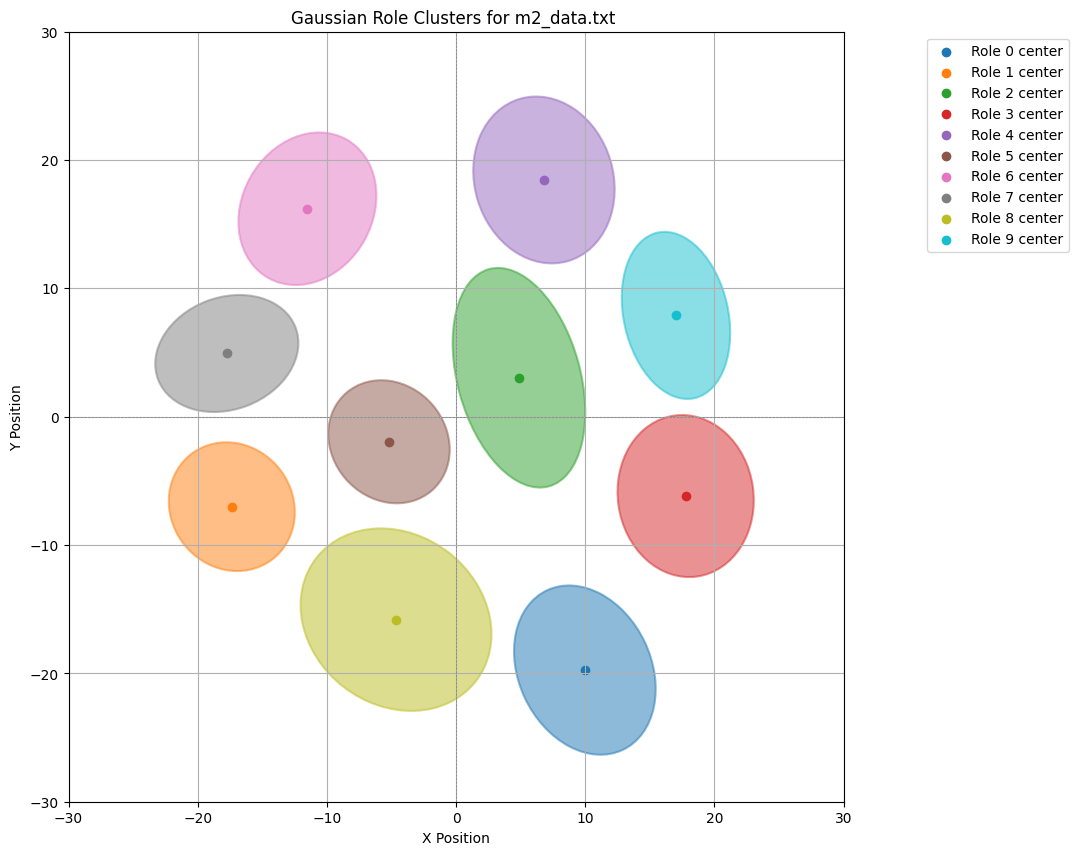

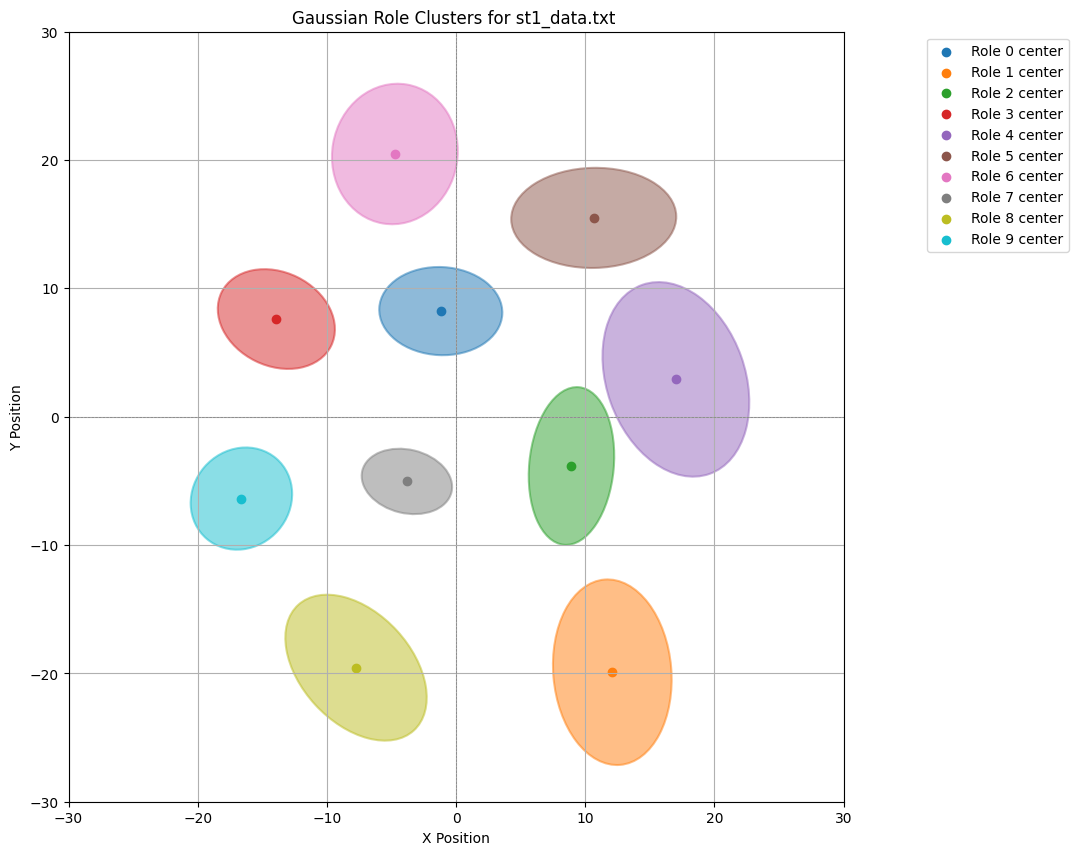

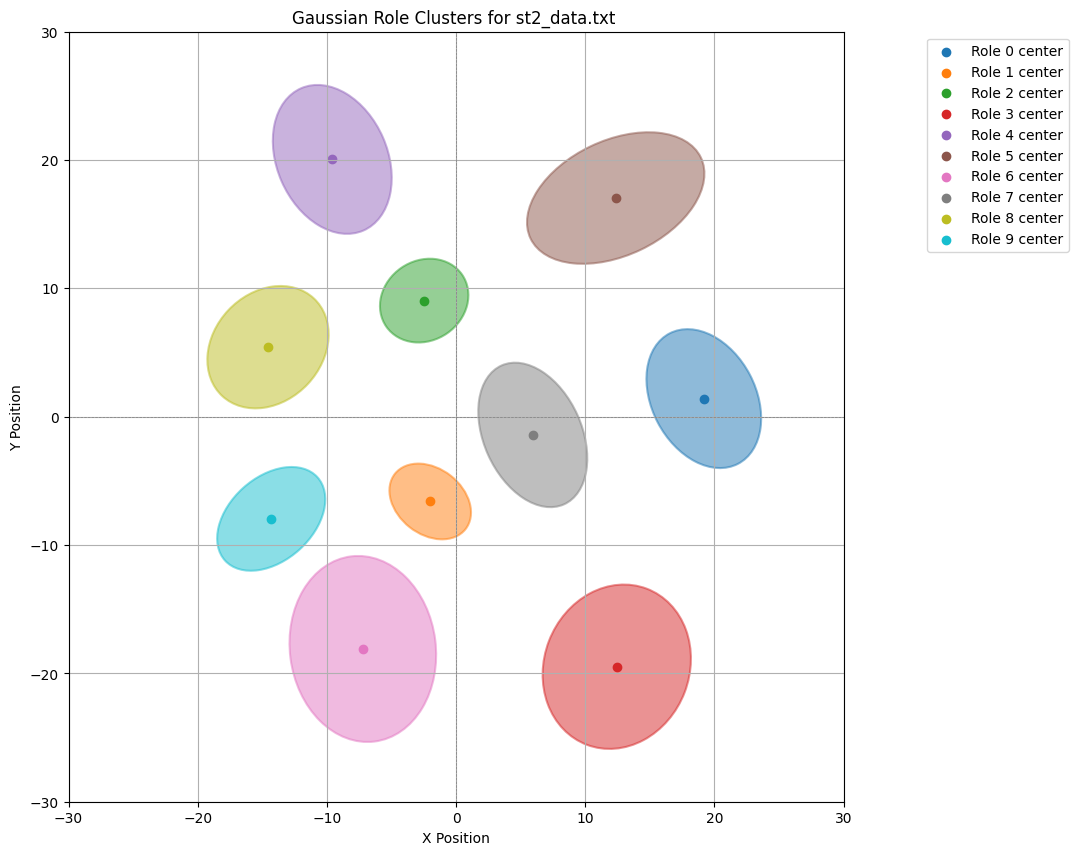

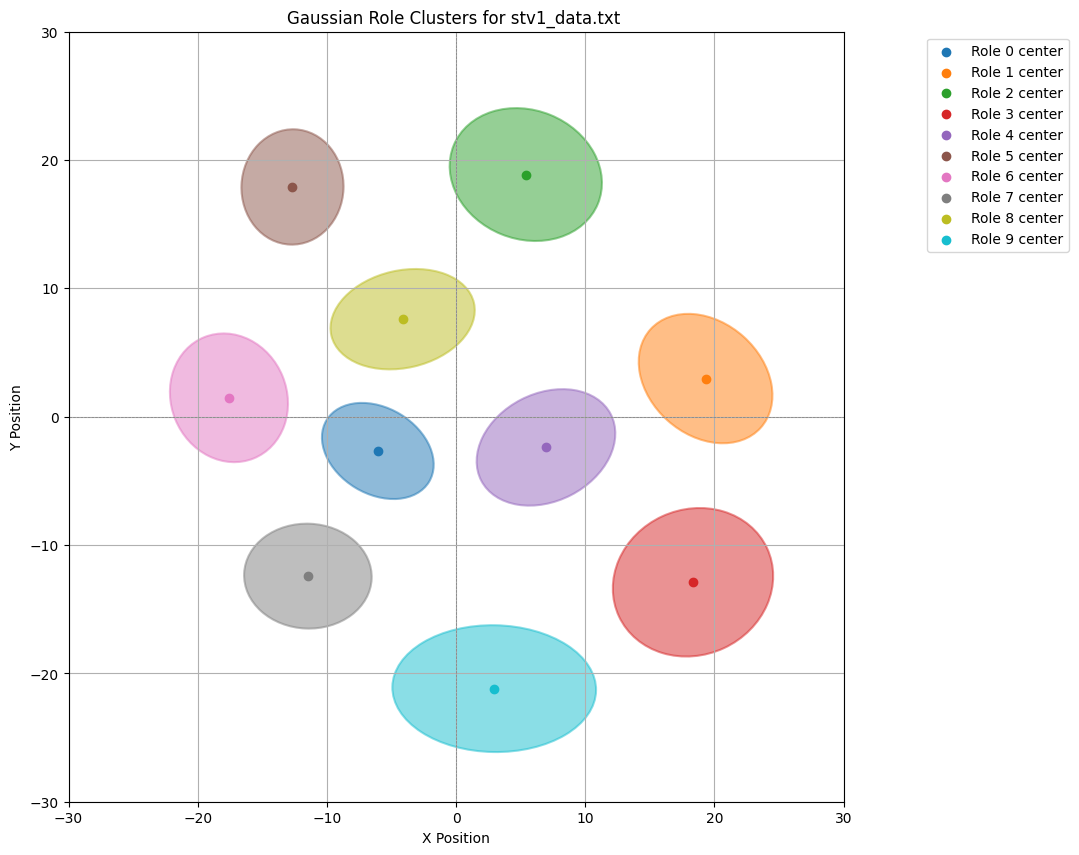

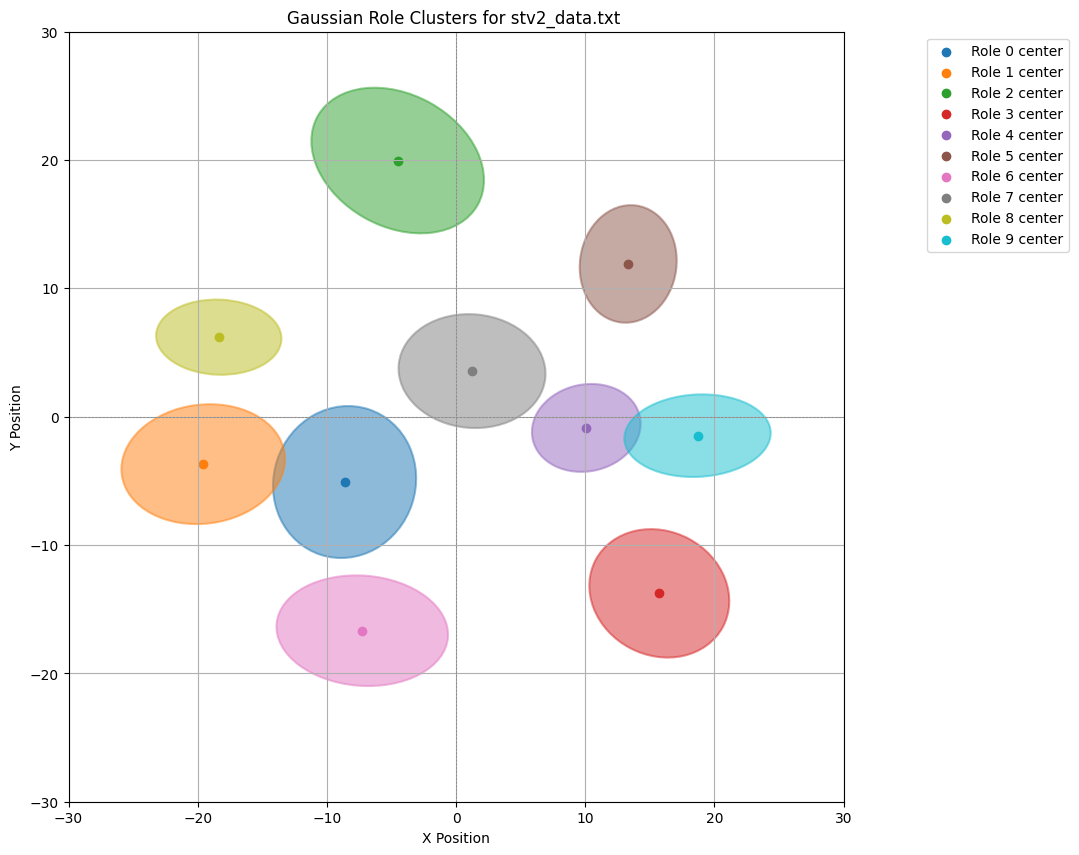

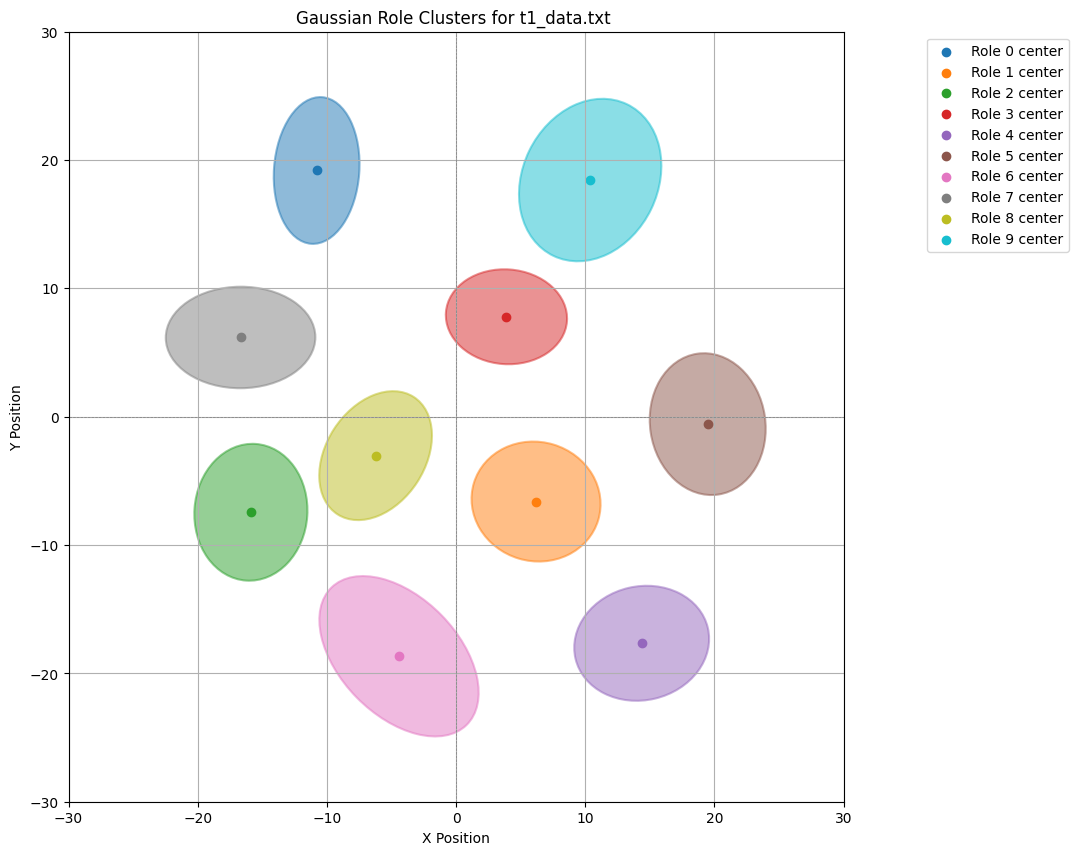

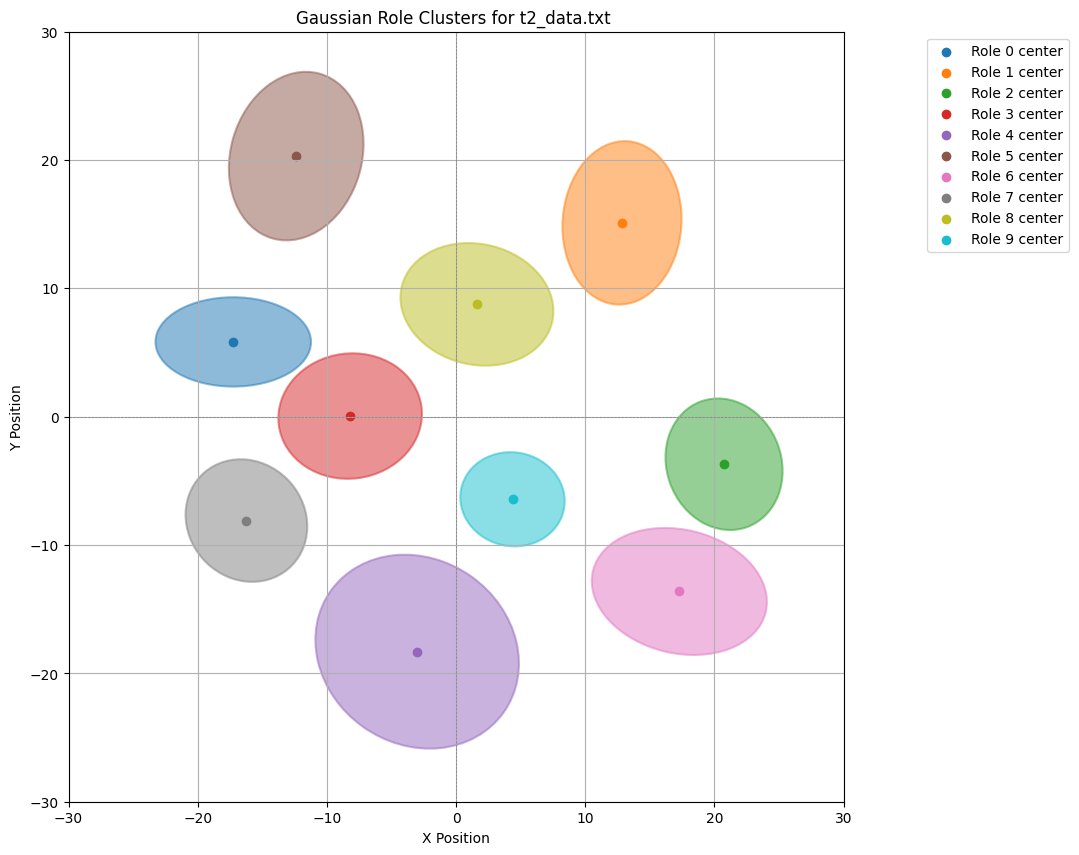

In [ ]:
# Function to plot Gaussian ellipses with transparency
def plot_gaussian_ellipse(mean, cov, ax, label, color, alpha=0.5):
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor=color, facecolor=color, alpha=alpha, lw=1.5)
    ax.add_patch(ellipse)
    ax.scatter(mean[0], mean[1], color=color, label=f'{label} center')

# Plot the updated roles for all files
for updated_role in updated_rols:
    file = updated_role['file']
    role_pdfs = updated_role['role_pdfs']

    
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = plt.cm.tab10(np.linspace(0, 1, len(role_pdfs)))

    for role, pdf in role_pdfs.items():
        mean = pdf.mean
        cov = pdf.cov
        plot_gaussian_ellipse(mean, cov, ax, label=f"Role {role}", color=colors[role])

    # Formatting plot
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_title(f"Gaussian Role Clusters for {file} ")
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    plt.grid(True)
    plt.show()
